In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_absolute_error,
    mean_squared_error,
    r2_score,roc_curve,auc
)

In [15]:
df=pd.read_csv('stocks.csv')
df.head()

,Date,Open,High,Low,Close
0,9/14/2018,2044.000000,2071.550049,2018.150024,2065.399902
1,9/17/2018,2070.000000,2077.800049,2054.550049,2074.149902
2,9/18/2018,2073.000000,2078.800049,2057.600098,2070.750000
3,9/19/2018,2071.899902,2089.000000,2066.850098,2077.899902
4,9/21/2018,2077.000000,2121.000000,2050.149902,2103.149902


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1235 non-null   object 
 1   Open    1235 non-null   float64
 2   High    1235 non-null   float64
 3   Low     1235 non-null   float64
 4   Close   1235 non-null   float64
dtypes: float64(4), object(1)
memory usage: 48.4+ KB


In [28]:
le=LabelEncoder()
df['Date']=le.fit_transform(df['Date'])

In [29]:
X=df.drop('Close',axis=1)
y=df['Close']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("mse =",mean_squared_error(y_test,y_pred))
print("rsme=",np.sqrt(mean_squared_error(y_test,y_pred)))
print("mae",mean_absolute_error(y_test,y_pred))

mse = 203.67233616738378
rsme= 14.271381718929103
mae 11.102272277316823


In [49]:
df1=pd.read_csv('titanic_cleaned.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    int64  
 5   Age                891 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    int64  
 9   Fare               891 non-null    float64
 10  Cabin              891 non-null    int64  
 11  Embarked           891 non-null    int64  
 12  Familysize         891 non-null    int64  
 13  isalone            891 non-null    int64  
 14  Title              891 non-null    object 
 15  AgeGroup           891 non-null    object 
 16  Age_scaled         891 non

In [50]:
df1.drop(['Title','AgeGroup','Name'],axis=1,inplace=True)

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Sex                891 non-null    int64  
 4   Age                891 non-null    float64
 5   SibSp              891 non-null    int64  
 6   Parch              891 non-null    int64  
 7   Ticket             891 non-null    int64  
 8   Fare               891 non-null    float64
 9   Cabin              891 non-null    int64  
 10  Embarked           891 non-null    int64  
 11  Familysize         891 non-null    int64  
 12  isalone            891 non-null    int64  
 13  Age_scaled         891 non-null    float64
 14  Fare_scales        891 non-null    float64
 15  Familysize_scaled  891 non-null    float64
dtypes: float64(5), int64(11)
m

In [62]:


X = df1.drop('Survived', axis=1)
y = df1['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = LogisticRegression()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(cm)


[[90 15]
 [22 52]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



AUC: 0.8729729729729729


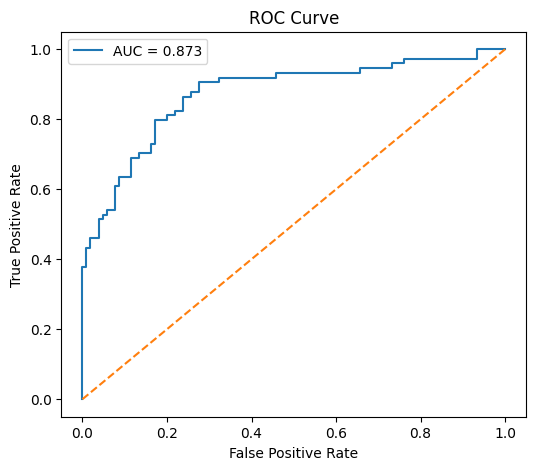

In [60]:
y_prob = clf.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("AUC:", roc_auc)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
